### Data analysis notebook for Hall Effect experiment
- Loads in voltage data taken with varying magnetic fields
- purpose is to experiment with analysis techniques eg. fitting methods and error propagation
- not intended to produce final results or plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
THICKNESS = 3e-6

### Files Are:
* 'n-typeGaAs_vary_B_1'
* 'n-typeGaAs_vary_B_2'
* 'p-typeGaAs_vary_B_1'
* 'p-typeGaAs_vary_B_2'
* 'ITO_vary_B_1'
* 'ITO_vary_B_2'
* 'InSb_vary_B_1'
* 'InSb_vary_B_2'

In [3]:
path = '/Users/Bryn_Lloyd/Documents/Uni/Year 3/Labs/Hall Effect/Data/Hall_Voltage/vary_B/'
data = pd.read_csv(f'{path}n-typeGaAs_vary_B_1.csv', delimiter=',',skipfooter=1)

/var/folders/04/pdk806xx0071jw34yd_hlyh80000gn/T/ipykernel_87410/2318301690.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f'{path}n-typeGaAs_vary_B_1.csv', delimiter=',',skipfooter=1)


In [4]:
y_1=[]
y_2=[]
y_3=[]
y_4=[]
for i in range(len(data)):
    y_1 = data['V_1']/data['I_1']
    y_2 = data['V_2']/data['I_2']
    y_3 = data['V_3']/data['I_3']
    y_4 = data['V_4']/data['I_4']
data['y_1'] = y_1
data['y_2'] = y_2
data['y_3'] = y_3
data['y_4'] = y_4

data

,B_1,V_1,I_1,B_2,V_2,I_2,B_3,V_3,I_3,B_4,V_4,I_4,y_1,y_2,y_3,y_4
0,0.00351,-10.196,2,-0.00476,-10.108,2,-0.00831,10.087,-2,0.00331,10.207,-2,-5.0980,-5.0540,-5.0435,-5.1035
1,0.02583,-10.442,2,-0.02633,-9.871,2,-0.02551,9.891,-2,0.02730,10.471,-2,-5.2210,-4.9355,-4.9455,-5.2355
2,0.04770,-10.682,2,-0.05670,-9.537,2,-0.05720,9.542,-2,0.04930,10.712,-2,-5.3410,-4.7685,-4.7710,-5.3560
3,0.08080,-11.048,2,-0.10230,-9.035,2,-0.07820,9.312,-2,0.07200,10.962,-2,-5.5240,-4.5175,-4.6560,-5.4810
4,0.10330,-11.296,2,-0.12400,-8.798,2,-0.09690,9.105,-2,0.10150,11.286,-2,-5.6480,-4.3990,-4.5525,-5.6430
5,0.12310,-11.515,2,-0.14980,-8.516,2,-0.12480,8.799,-2,0.12440,11.538,-2,-5.7575,-4.2580,-4.3995,-5.7690
6,0.14690,-11.776,2,-0.18280,-8.154,2,-0.14840,8.541,-2,0.14830,11.800,-2,-5.8880,-4.0770,-4.2705,-5.9000
7,0.17050,-12.035,2,-0.19900,-7.976,2,-0.17500,8.249,-2,0.17320,12.073,-2,-6.0175,-3.9880,-4.1245,-6.0365
8,0.20100,-12.371,2,-0.24320,-7.492,2,-0.19450,8.035,-2,0.20090,12.377,-2,-6.1855,-3.7460,-4.0175,-6.1885
9,0.22300,-12.614,2,-0.26170,-7.292,2,-0.22040,7.751,-2,0.23570,12.759,-2,-6.3070,-3.6460,-3.8755,-6.3795


## each set of measurements plotted seperately

Hall coefficients: [-1.65249448e-05 -1.64023938e-05 -1.64300680e-05 -1.64688183e-05] +/- [1.48810076e-08 1.37156706e-08 1.23446212e-08 1.81027166e-08]


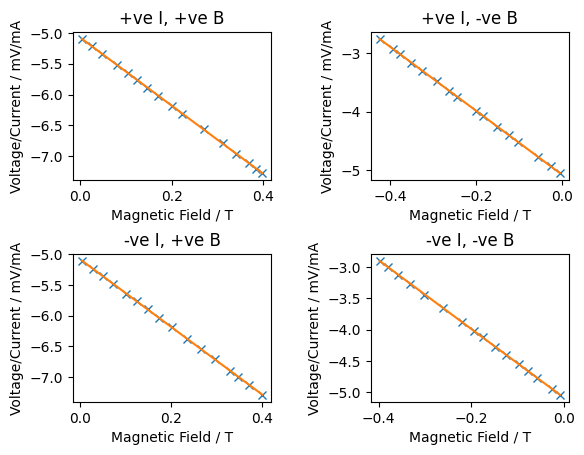

In [11]:
fit_1,cov_1 = np.polyfit(data['B_1'],data['y_1'],1,cov=True)
pfit_1 = np.poly1d(fit_1)

fit_2,cov_2 = np.polyfit(data['B_2'],data['y_2'],1,cov=True)
pfit_2 = np.poly1d(fit_2)

fit_3,cov_3 = np.polyfit(data['B_3'],data['y_3'],1,cov=True)
pfit_3 = np.poly1d(fit_3)

fit_4,cov_4 = np.polyfit(data['B_4'],data['y_4'],1,cov=True)
pfit_4 = np.poly1d(fit_4)


fig,ax = plt.subplots(2,2)
fig.subplots_adjust(hspace=0.5,wspace=0.5)
ax[0,0].plot(data['B_1'],data['y_1'],'x')
ax[0,0].plot(data['B_1'],pfit_1(data['B_1']))
ax[0,0].set_title('+ve I, +ve B')
ax[0,0].set_xlabel('Magnetic Field / T')
ax[0,0].set_ylabel('Voltage/Current / mV/mA')

ax[0,1].plot(data['B_2'],data['y_2'],'x')
ax[0,1].plot(data['B_2'],pfit_2(data['B_2']))
ax[0,1].set_title('+ve I, -ve B')
ax[0,1].set_xlabel('Magnetic Field / T')
ax[0,1].set_ylabel('Voltage/Current / mV/mA')

ax[1,0].plot(data['B_4'],data['y_4'],'x')
ax[1,0].plot(data['B_4'],pfit_4(data['B_4']))
ax[1,0].set_title('-ve I, +ve B')
ax[1,0].set_xlabel('Magnetic Field / T')
ax[1,0].set_ylabel('Voltage/Current / mV/mA')

ax[1,1].plot(data['B_3'],data['y_3'],'x')
ax[1,1].plot(data['B_3'],pfit_3(data['B_3']))
ax[1,1].set_title('-ve I, -ve B')
ax[1,1].set_xlabel('Magnetic Field / T')
ax[1,1].set_ylabel('Voltage/Current / mV/mA')

effective_hall_coefficients = np.array([fit_1[0],fit_2[0],fit_3[0],fit_4[0]])
effective_hall_coefficients_error = np.array([np.sqrt(cov_1[0][0]),np.sqrt(cov_2[0][0]),np.sqrt(cov_4[0][0]),np.sqrt(cov_3[0][0])])
hall_coefficients = effective_hall_coefficients * THICKNESS
hall_coefficients_error = hall_coefficients * effective_hall_coefficients_error/effective_hall_coefficients

print(f'Hall coefficients: {hall_coefficients} +/- {hall_coefficients_error}')

### Combining all 4 fits

* +(+,+ , -,-) - (-,+ , +,-)

In [6]:
official_coeff = (hall_coefficients[0]-hall_coefficients[3]+hall_coefficients[2]-hall_coefficients[1])/4
official_coeff

-2.0950166634130533e-08

## Plotting +ve current together and -ve current together

Hall coefficients: [-1.65249448e-05 -1.64023938e-05 -1.64300680e-05 -1.64688183e-05] +/- [1.48810076e-08 1.37156706e-08 1.23446212e-08 1.81027166e-08]


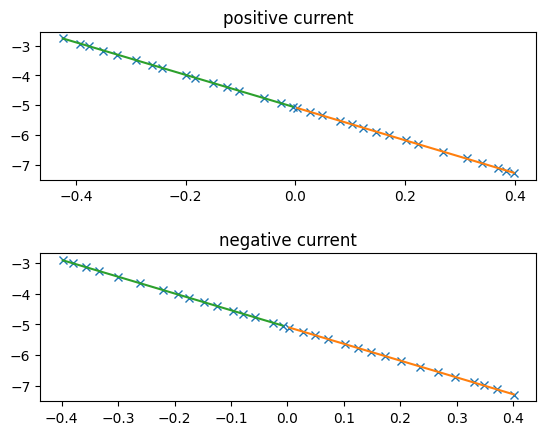

In [7]:
pos_current_x = np.concatenate((data['B_1'],data['B_2']))
pos_current_y = np.concatenate((data['y_1'],data['y_2']))
neg_current_x = np.concatenate((data['B_4'],data['B_3']))
neg_current_y = np.concatenate((data['y_4'],data['y_3']))


fig,ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.5)
ax[0].set_title('positive current')
ax[0].plot(pos_current_x,pos_current_y,'x')
ax[0].plot(data['B_1'],pfit_1(data['B_1']))
ax[0].plot(data['B_2'],pfit_2(data['B_2']))

ax[1].set_title('negative current')
ax[1].plot(neg_current_x,neg_current_y,'x')
ax[1].plot(data['B_4'],pfit_4(data['B_4']))
ax[1].plot(data['B_3'],pfit_3(data['B_3']))



print(f'Hall coefficients: {hall_coefficients} +/- {hall_coefficients_error}')

Hall coefficients for positive and negative currents: [-1.64642317e-05 -1.64538390e-05] +/- [7.80368080e-09 5.99647221e-09]


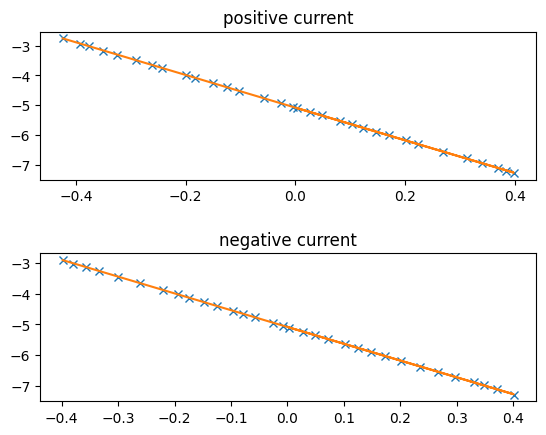

In [8]:
fit_positive,cov_positive = np.polyfit(pos_current_x,pos_current_y,1,cov=True)
pfit_positive = np.poly1d(fit_positive)
fit_negative,cov_negative = np.polyfit(neg_current_x,neg_current_y,1,cov=True)
pfit_negative = np.poly1d(fit_negative)


fig,ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.5)
ax[0].set_title('positive current')
ax[0].plot(pos_current_x,pos_current_y,'x')
ax[0].plot(pos_current_x,pfit_positive(pos_current_x))

ax[1].set_title('negative current')
ax[1].plot(neg_current_x,neg_current_y,'x')
ax[1].plot(neg_current_x,pfit_positive(neg_current_x))

two_effective_coefficients = np.array([fit_positive[0],fit_negative[0]])
two_effective_coefficients_error = np.array([np.sqrt(cov_positive[0][0]),np.sqrt(cov_negative[0][0])])
two_coefficients = THICKNESS * two_effective_coefficients
two_coefficients_error = two_coefficients * two_effective_coefficients_error/two_effective_coefficients

print(f'Hall coefficients for positive and negative currents: {two_coefficients} +/- {two_coefficients_error}')


## combining all measurements into a single plot

Hall coefficient of total combined dataset: -1.645979467652994e-05 +/- 5.805523998067772e-09


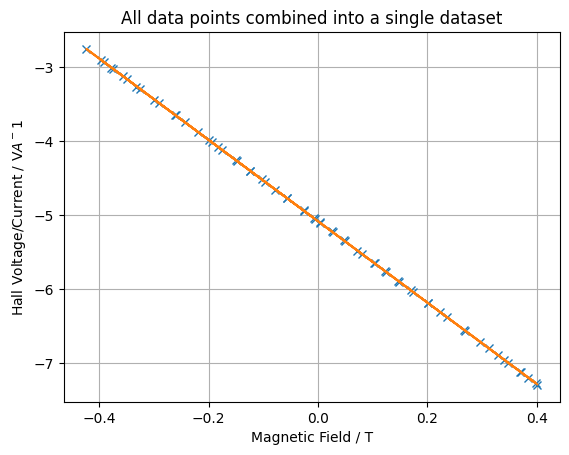

In [9]:
x_total = np.concatenate((data['B_1'],data['B_2'],data['B_3'],data['B_4']))
y_total = np.concatenate((data['y_1'],data['y_2'],data['y_3'],data['y_4']))

fit_tot, cov_tot = np.polyfit(x_total,y_total,1,cov=True)
pfit_tot = np.poly1d(fit_tot)

plt.title('All data points combined into a single dataset')
plt.plot(x_total,y_total,'x')
plt.plot(x_total,pfit_tot(x_total))
plt.xlabel('Magnetic Field / T')
plt.ylabel('Hall Voltage/Current / V$A^-1$')
plt.grid()

eff_coeff = fit_tot[0]
eff_coeff_err = np.sqrt(cov_tot[0][0])
coeff = THICKNESS * eff_coeff
coeff_err = coeff * eff_coeff_err/eff_coeff

print(f'Hall coefficient of total combined dataset: {coeff} +/- {coeff_err}')